##Patient Experience & Service Journey Analytics


##Importing Labraries and the Datasets.

## Dataset Description

This analysis uses three synthetic datasets representing patient demographics, patient experience survey responses, and healthcare service journey events. The data is designed to mimic realistic public healthcare patterns while remaining fully privacy-safe.

The datasets enable demographic segmentation, experience driver analysis, funnel analysis, and time-based trend exploration.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

patients = pd.read_csv("/content/patients_demographics.csv")
surveys = pd.read_csv("/content/patient_experience_surveys.csv")
funnel = pd.read_csv("/content/patient_service_funnel.csv")


In [ ]:
# Missing values analysis
missing_summary = (
    surveys.isnull()
    .mean()
    .reset_index()
    .rename(columns={"index": "column", 0: "missing_ratio"})
)

missing_summary


,column,missing_ratio
0,survey_id,0.000000
1,patient_id,0.000000
2,survey_date,0.000000
3,overall_satisfaction,0.000000
4,communication_score,0.101538
5,timeliness_score,0.098077
6,staff_courtesy_score,0.000000
7,facility_cleanliness_score,0.000000
8,would_recommend,0.000000
9,free_text_sentiment,0.000000


In [ ]:
surveys["survey_date"] = pd.to_datetime(surveys["survey_date"])

surveys["survey_year"] = surveys["survey_date"].dt.year
surveys["survey_quarter"] = surveys["survey_date"].dt.to_period("Q").astype(str)

surveys["recommend_flag"] = surveys["would_recommend"].map({"Yes": 1, "No": 0})


##Data Integration for EDA

In [ ]:
#Data integration for EDA
survey_full = surveys.merge(
    patients,
    on="patient_id",
    how="left",
    validate="many_to_one"
)


##Hyptothesis Testing

In [ ]:
#HYPOTHESIS 1 -DRIVEN EDA

driver_corr = survey_full[
    ["overall_satisfaction", "communication_score", "timeliness_score"]
].corr()

driver_corr


,overall_satisfaction,communication_score,timeliness_score
overall_satisfaction,1.000000,0.79319,0.593288
communication_score,0.793190,1.00000,0.455830
timeliness_score,0.593288,0.45583,1.000000


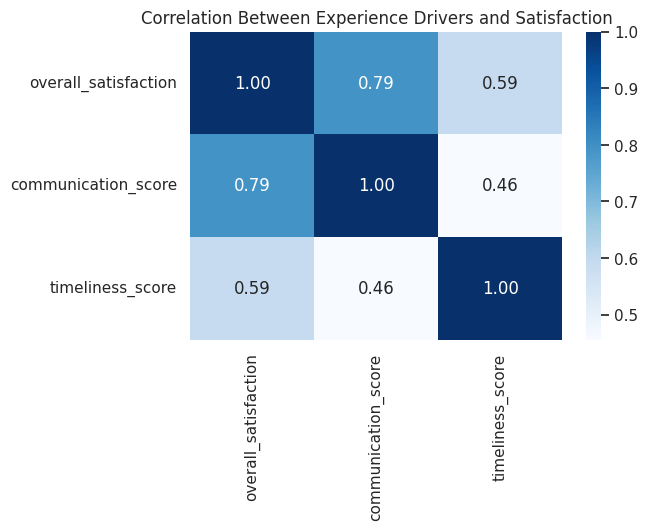

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(driver_corr, annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Between Experience Drivers and Satisfaction")
plt.show()


In [ ]:
#Hypothesis 2 : Does Satisfaction Decline With Age?
age_sat = (
    survey_full
    .groupby("age_group")["overall_satisfaction"]
    .mean()
    .reset_index()
)


/tmp/ipython-input-609530108.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_sat, x="age_group", y="overall_satisfaction", palette="Blues_d")


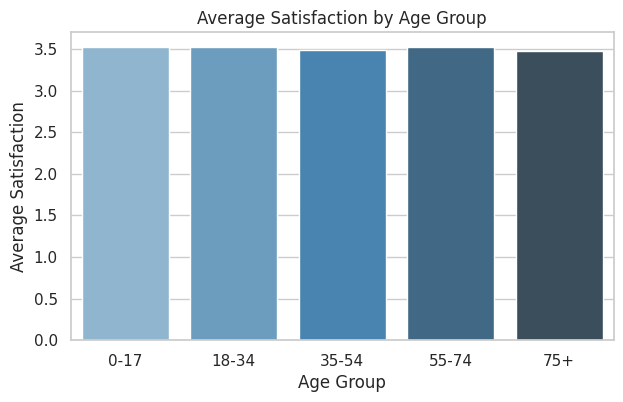

In [ ]:
plt.figure(figsize=(7,4))
sns.barplot(data=age_sat, x="age_group", y="overall_satisfaction", palette="Blues_d")
plt.title("Average Satisfaction by Age Group")
plt.ylabel("Average Satisfaction")
plt.xlabel("Age Group")
plt.show()


##Experience Behavior Link

In [ ]:
#7️ EXPERIENCE → BEHAVIOR LINK (NEW & IMPORTANT)

recommend_analysis = (
    survey_full
    .groupby("recommend_flag")["overall_satisfaction"]
    .mean()
)

recommend_analysis


,overall_satisfaction
recommend_flag,
0,2.976328
1,4.307618


/tmp/ipython-input-1197313413.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


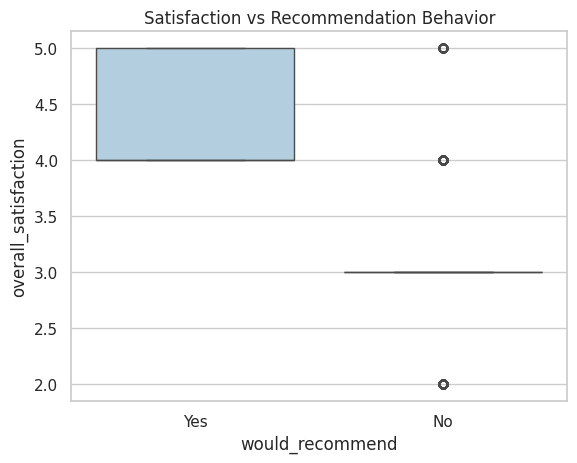

In [ ]:
sns.boxplot(
    data=survey_full,
    x="would_recommend",
    y="overall_satisfaction",
    palette="Blues"
)
plt.title("Satisfaction vs Recommendation Behavior")
plt.show()


##Funnel Analysis

In [ ]:
#FUNNEL ANALYSIS
funnel_counts = (
    funnel
    .groupby(["step_sequence", "funnel_step"])["patient_id"]
    .nunique()
    .reset_index()
    .sort_values("step_sequence")
)

funnel_counts


,step_sequence,funnel_step,patient_id
0,1,Viewed Service Information,4000
1,2,Appointment Scheduled,3416
2,3,Appointment Attended,2240
3,4,Survey Invitation Sent,1705
4,5,Survey Completed,1030


In [ ]:
#funnel drop off calculations (Helps us calculate how many patients dropped off at each step)
funnel_counts["previous_count"] = funnel_counts["patient_id"].shift(1)
funnel_counts["drop_off_rate"] = (
    1 - funnel_counts["patient_id"] / funnel_counts["previous_count"]
)

funnel_counts



,step_sequence,funnel_step,patient_id,previous_count,drop_off_rate
0,1,Viewed Service Information,4000,NaN,NaN
1,2,Appointment Scheduled,3416,4000.0,0.146000
2,3,Appointment Attended,2240,3416.0,0.344262
3,4,Survey Invitation Sent,1705,2240.0,0.238839
4,5,Survey Completed,1030,1705.0,0.395894


In [ ]:
# AGE-BASED FUNNEL SEGMENTATION
funnel_age = funnel.merge(
    patients[["patient_id", "age_group"]],
    on="patient_id",
    how="left"
)

funnel_age_counts = (
    funnel_age
    .groupby(["age_group", "funnel_step"])["patient_id"]
    .nunique()
    .reset_index()
)

funnel_age_counts.head()


,age_group,funnel_step,patient_id
0,0-17,Appointment Attended,262
1,0-17,Appointment Scheduled,405
2,0-17,Survey Completed,115
3,0-17,Survey Invitation Sent,198
4,0-17,Viewed Service Information,484


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['patient_id'].plot(kind='hist', bins=20, title='patient_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('funnel_step').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='index', y='patient_id', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['patient_id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('funnel_step')):
  _plot_series(series, series_name, i)
  fig.legend(title='funnel_step', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('patient_id')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('funnel_step')):
  _plot_series(series, series_name, i)
  fig.legend(title='funnel_step', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_6['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['patient_id'].plot(kind='line', figsize=(8, 4), title='patient_id')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_8['funnel_step'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_8, x='index', y='funnel_step', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_9['funnel_step'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_9, x='patient_id', y='funnel_step', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

##Merging all data sets for further Analysis

In [ ]:
#Mergin tables for EDA - (Exploratory Data Analysis)

survey_full = surveys.merge(
    patients,
    on="patient_id",
    how="left"
)

survey_full.head()

,survey_id,patient_id,survey_date,overall_satisfaction,communication_score,timeliness_score,staff_courtesy_score,facility_cleanliness_score,would_recommend,free_text_sentiment,age,gender,age_group,region,socioeconomic_band,chronic_condition_flag
0,SV_K1MPLA10IB,PT_01DVVH6SD4,2025-10-11 15:03:23.726690,5,5.0,4.0,5,5,Yes,Positive,22,Male,18-34,Rural,Medium,No
1,SV_K51GLRAPDN,PT_74ADD0GN7R,2025-12-01 15:03:23.726690,2,2.0,1.0,1,1,No,Neutral,12,Male,0-17,Urban,Low,No
2,SV_M46H4AH5KT,PT_DNBLWD8M7A,2023-08-01 15:03:23.726690,3,3.0,4.0,2,3,No,Positive,99,Female,75+,Urban,Medium,Yes
3,SV_8ZC6PUCUXE,PT_VB6HPPHPM0,2026-01-05 15:03:23.726690,5,5.0,5.0,5,5,Yes,Positive,67,Female,55-74,Urban,High,Yes
4,SV_CE4PEVH4QL,PT_KXXKXNOAD7,2023-09-30 15:03:23.726690,3,3.0,1.0,4,4,No,Positive,87,Female,75+,Suburban,Low,Yes


In [ ]:
#Feature Engineering

# Convert survey_date to datetime
surveys["survey_date"] = pd.to_datetime(surveys["survey_date"])

# Year and month for trend analysis
surveys["survey_year"] = surveys["survey_date"].dt.year
surveys["survey_month"] = surveys["survey_date"].dt.month

# Binary numeric flag
surveys["recommend_flag"] = surveys["would_recommend"].map({"Yes": 1, "No": 0})

In [ ]:
#Satisfaction by age group

survey_full.groupby("age_group")["overall_satisfaction"].mean()

,overall_satisfaction
age_group,
0-17,3.524430
18-34,3.522593
35-54,3.491649
55-74,3.520186
75+,3.472527
